## Loading some libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Exploration

In [2]:
df = pd.read_csv('walmart.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [3]:
# checking the size of the data
df.shape

(550068, 10)

In [4]:
# checking the column names
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
# checking unique counts of each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Data Info:

- Walmart is a globally recognized retail giant, renowned for offering a wide range of products at competitive prices, and providing a convenient shopping experience for millions of customers worldwide.

- Analyzing this dataset offers valuable insights into Walmart's customer base and purchasing behavior. It reveals details about customer demographics, product preferences, and spending patterns. This comprehensive dataset is a valuable resource for understanding various aspects of Walmart's operations, such as marketing strategies, customer segmentation, and product demand. It can enhance strategic decision-making in areas like inventory management, targeted marketing, and customer relationship management.

#### The datset contains the following columns:

- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation(Masked)
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category (Masked)
- Purchase: Purchase Amount


#### Potential Usecases

- Customer Segmentation
- Market Basket Analysis
- Personalized Marketing
- Demand Forecasting
- Product Recommendation Systems
- Customer Lifetime Value (CLV) Analysis
- Sales and Revenue Analysis
- Urban vs. Rural Analysis
- Occupational Influence on Purchases
- Customer Loyalty Programs
- Marital Status and Shopping Behavior
- Price Sensitivity Analysis
- Optimizing pricing strategies to maximize sales and profitability

## Data Understanding:

- 1. We have 550068 records.
- 2. We have 5891 users
- 3. we have 3631 products
- 4. Major Data types are int64 and object
- 5. No missing values 

In [6]:
# checking the data types of each column
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [7]:
# checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
# Do we have missing values?

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()

0

In [10]:
# sectioning the data into different data types
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [11]:
numerical_cols

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

In [12]:
categorical_cols

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

## Univariate Analysis - Checking facts about each column int the dataset. 

We'll be skipping the product and user id for now.

In [13]:
# unique values in the data
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

#### Gender

In [14]:
# counting values in Gender
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

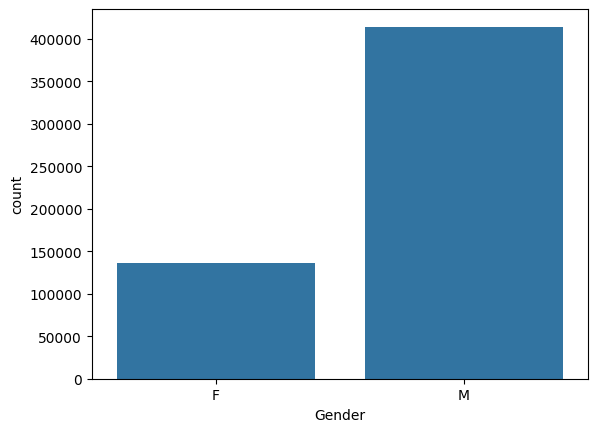

In [15]:
# making countplot for the Gender
sns.countplot(x = df['Gender'])

In [16]:
# calculating the percentage if M to F in Gender
df['Gender'].value_counts(normalize = True)

Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64

#### Age

In [17]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\3564553045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Age'], order = df['Age'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Age', ylabel='count'>

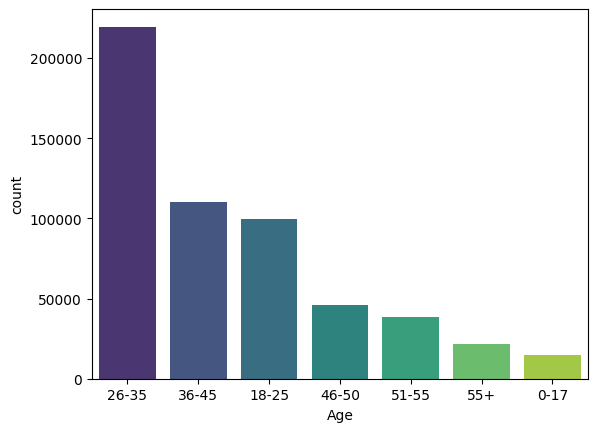

In [18]:
# countplot for Age
sns.countplot(x = df['Age'], order = df['Age'].value_counts().index, palette = 'viridis')

In [19]:
# percentage of each age group
df['Age'].value_counts(normalize = True)

Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, dtype: float64

#### Occupation

In [20]:
df['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\100630099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Occupation'], order = df['Occupation'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Occupation', ylabel='count'>

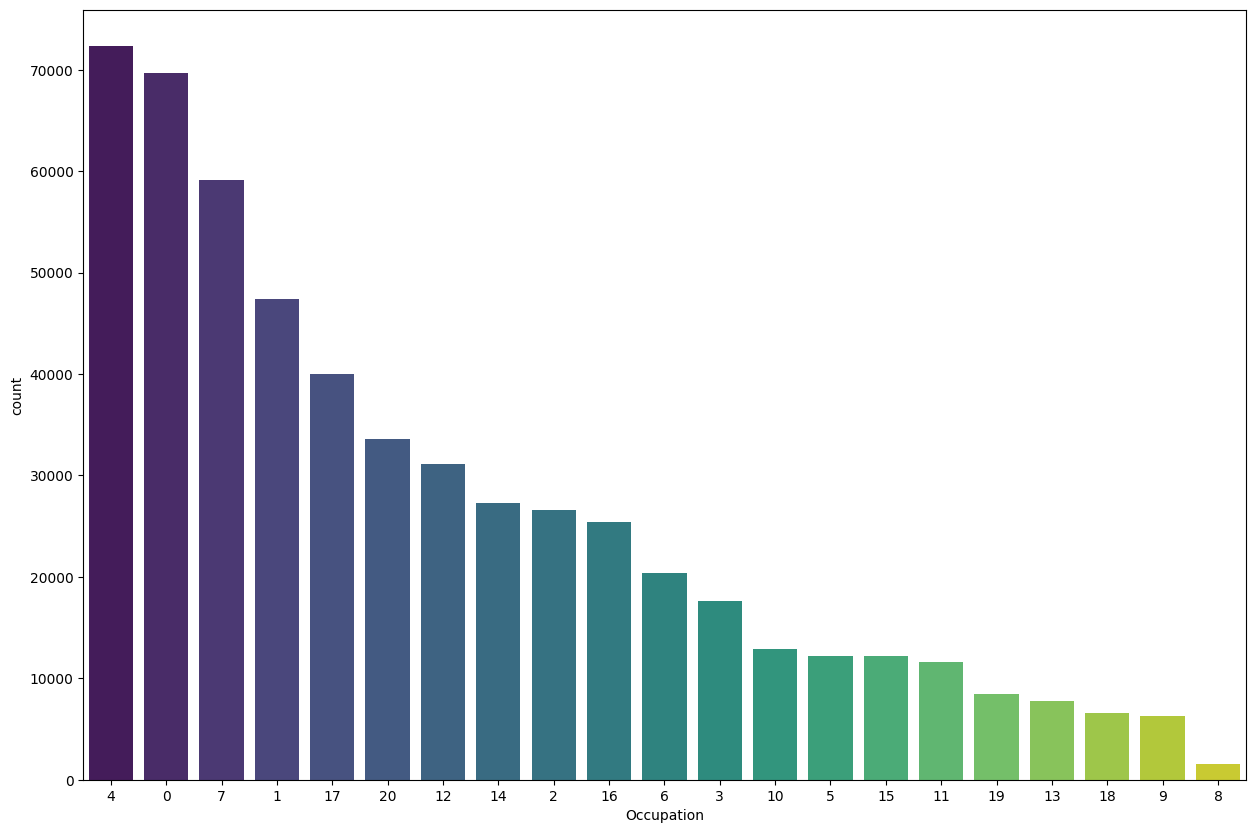

In [21]:
# countplot for Occupation
plt.figure(figsize = (15, 10))

sns.countplot(x = df['Occupation'], order = df['Occupation'].value_counts().index, palette = 'viridis')

In [22]:
# percentage of each occupation
df['Occupation'].value_counts(normalize = True)

Occupation
4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: proportion, dtype: float64

#### City Category

In [23]:
# counting values in City_Category
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\2359335939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['City_Category'], order = df['City_Category'].value_counts().index, palette = 'viridis')


<Axes: xlabel='City_Category', ylabel='count'>

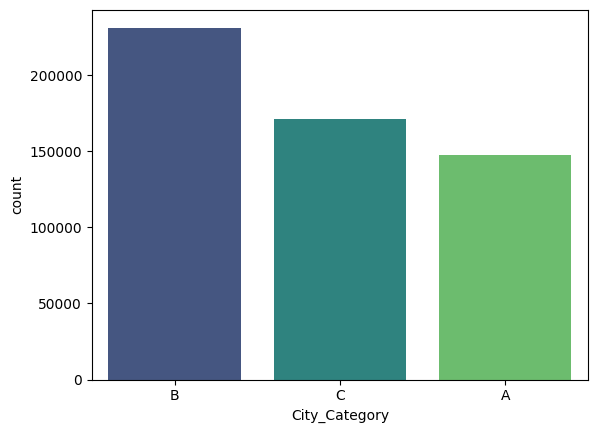

In [24]:
# countplot for City_Category
sns.countplot(x = df['City_Category'], order = df['City_Category'].value_counts().index, palette = 'viridis')

In [25]:
# percentage of each city category
df['City_Category'].value_counts(normalize = True)

City_Category
B    0.420263
C    0.311189
A    0.268549
Name: proportion, dtype: float64

#### Stay In Current City Years

In [26]:
# counting values in Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\266666560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Stay_In_Current_City_Years'], order = df['Stay_In_Current_City_Years'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

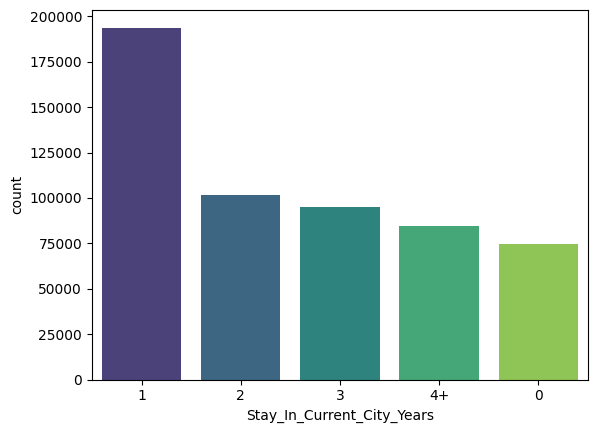

In [27]:
# countplot for Stay_In_Current_City_Years
sns.countplot(x = df['Stay_In_Current_City_Years'], order = df['Stay_In_Current_City_Years'].value_counts().index, palette = 'viridis')

In [28]:
# percentage of each stay in current city years
df['Stay_In_Current_City_Years'].value_counts(normalize = True)

Stay_In_Current_City_Years
1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: proportion, dtype: float64

#### Marital Status

In [29]:
# value counts for Marital_Status
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\3449557410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Marital_Status'], palette = 'viridis')


<Axes: xlabel='Marital_Status', ylabel='count'>

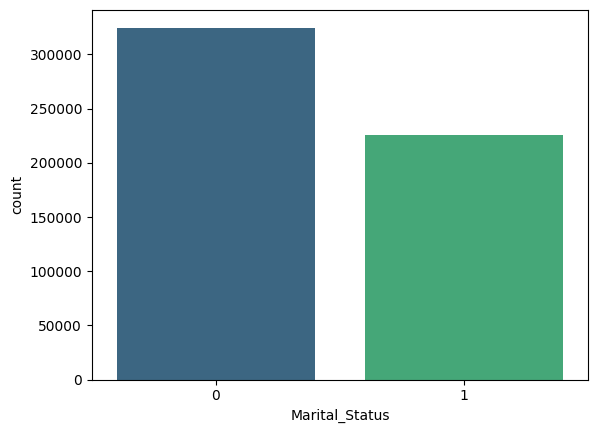

In [30]:
# countplot for Marital_Status
sns.countplot(x = df['Marital_Status'], palette = 'viridis')

In [31]:
# percentage of each marital status
df['Marital_Status'].value_counts(normalize = True)

Marital_Status
0    0.590347
1    0.409653
Name: proportion, dtype: float64

#### Product Category

In [32]:
# value counts for Product_Category
df['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\110135945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Product_Category'], order = df['Product_Category'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Product_Category', ylabel='count'>

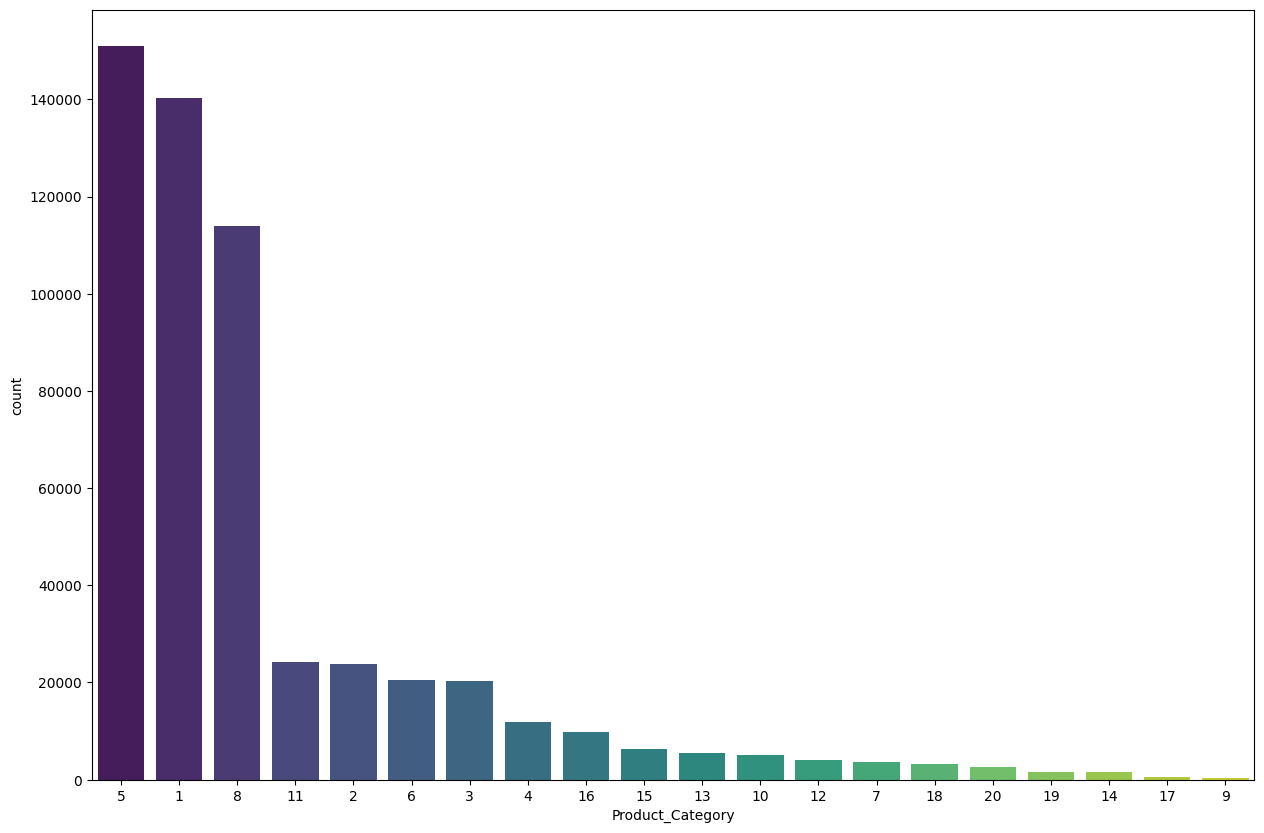

In [33]:
# countplot for Product_Category
plt.figure(figsize = (15, 10))
sns.countplot(x = df['Product_Category'], order = df['Product_Category'].value_counts().index, palette = 'viridis')

In [34]:
# percentage of each product category
df['Product_Category'].value_counts(normalize = True)

Product_Category
5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: proportion, dtype: float64

#### Purchase

In [35]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

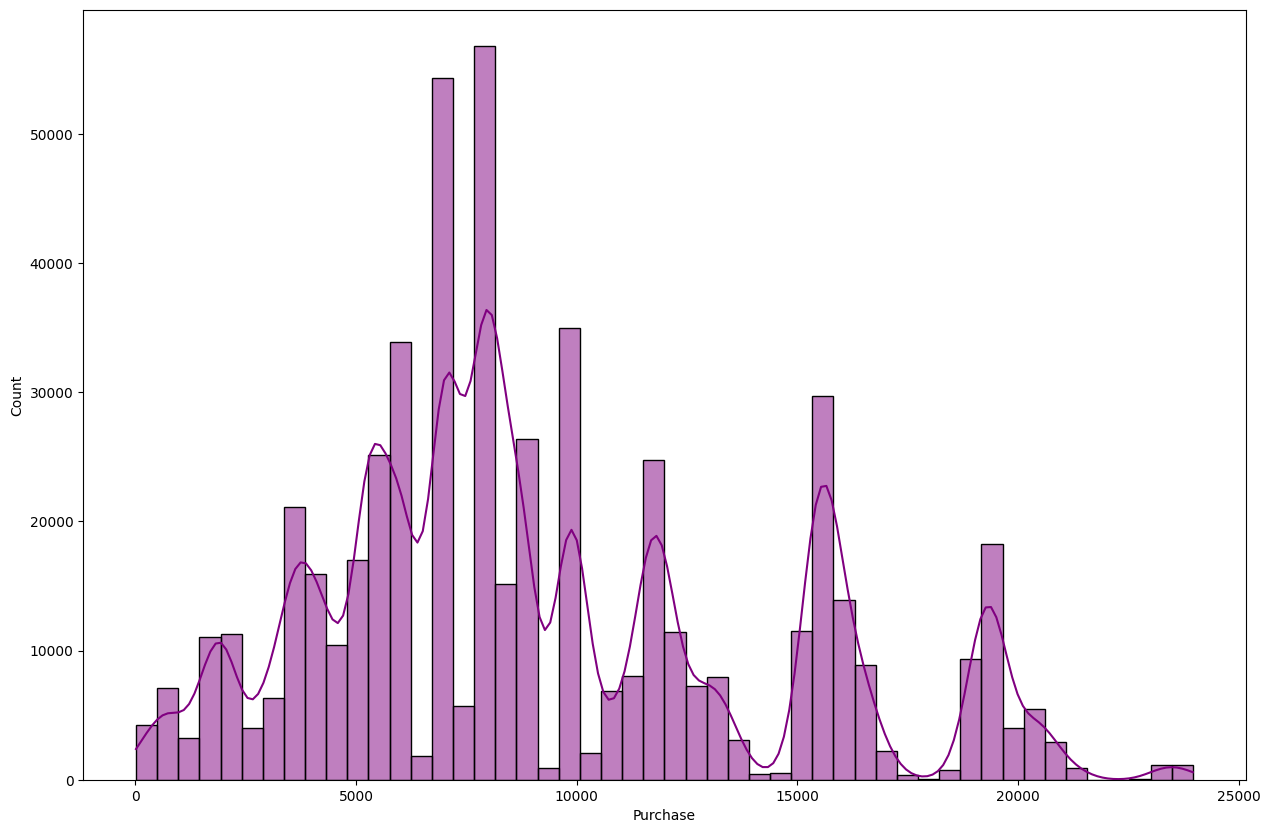

In [36]:
# distribution plot for Purchase
plt.figure(figsize = (15, 10))
sns.histplot(df['Purchase'], bins = 50, kde = True, color = 'purple')

## Data Understanding:

- 1. We have 550068 records.
- 2. We have 5891 users
- 3. we have 3631 products
- 4. Major Data types are int64 and object
- 5. No missing values 
- 6. No Duplicated row in the dataset
- 7. We have more Males visiting Walmart store compared to females. The data consists of 75.3% of Males and 24.7% of Females. 
- 8. A lot of the customes visiting the store are Middle Age - We have 40% of the customers in the Age group of 26-35, 20% for 36-45, and 18.1% for 18-25. This means that 78% of the customers are youths.
- 9. The Occupation groups 4, 0 and 7 appears to have a lot of customers in that category. 
- 10. A lot of the customers are from City B and C. Maybe that's because it's closer to the store (we don't know their exact locations)
- 11. Customers that have spend a year in a city tends to get used to the store in that city. While those that have stayed longer seems to be losing interest. This is worth an investigation. 
- 12. Assuming Marital Status of 0 means single, then well say that walmart sales attracts more singles than married (to an extent though).
- 13. Product Category 5, 1 and 8 seems to be very popular amongst customers since they appear to have high appearance in the data. Though this should still be boiled down to the product ID that contributes best. 
- 14. The purchase seems to be distributed. A lot needs to be investigated here. 

In [37]:
# unique values in the data
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Let's proceed with our analysis.. Our Goal is to Understand everything about the Customers of Walmart

We are exploring all the categorical features.

Questions.. 

- Who spends more, Male or Female on the Average?
- What products are explored more for people in each category? 
- 

In [45]:
# creating a groupby for the Gender. Aim is to see the average purchase of each

gender_purchase = df.groupby(['Gender'])['Purchase'].sum().sort_values(ascending=False).reset_index()
gender_purchase

,Gender,Purchase
0,M,3909580100
1,F,1186232642


C:\Users\timmy\AppData\Local\Temp\ipykernel_19860\3310990201.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='Purchase', estimator=sum, ci=None)


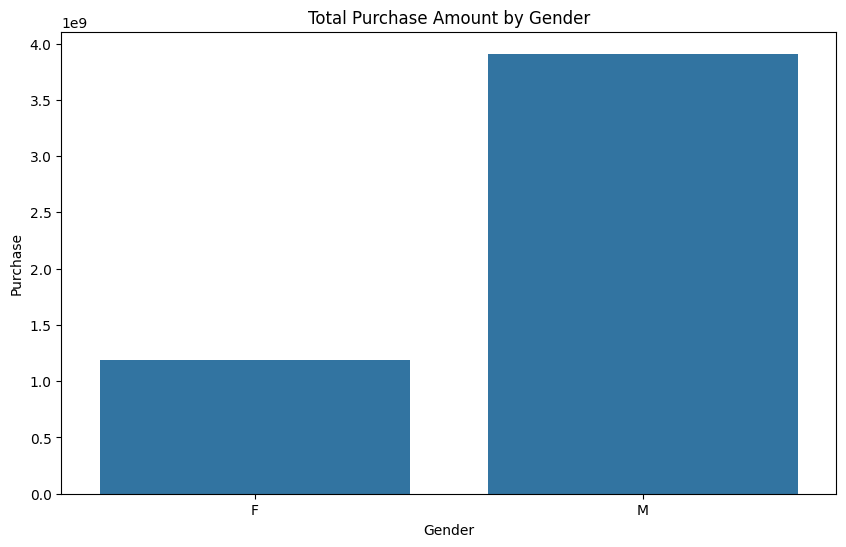

In [47]:
# Gender vs Purchase
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Purchase', estimator=sum, ci=None)
plt.title('Total Purchase Amount by Gender')
plt.show()

In [46]:
# creating a groupby for the Gender. Aim is to see the average purchase of each

gender_purchase = df.groupby(['Gender'])['Purchase'].mean().sort_values(ascending=False).reset_index()
gender_purchase

,Gender,Purchase
0,M,9437.526040
1,F,8734.565765


In [39]:
# counting the product category with the highest purchase
gender_product= df.groupby(['Gender'])['Product_Category'].count().sort_values(ascending=False).reset_index()
gender_product

,Gender,Product_Category
0,M,414259
1,F,135809


In [43]:
# counting the product category with the highest purchase
gender_product= df.groupby(['Gender'])['Product_Category'].mean().sort_values(ascending=False).reset_index()
gender_product

,Gender,Product_Category
0,F,5.717714
1,M,5.301512


In [52]:
# Top Five Products by Gender
top_products_by_gender = df.groupby(['Gender', 'Product_Category']).size().reset_index(name='Counts')
top_products_by_gender = top_products_by_gender.sort_values(['Gender', 'Counts'], ascending=[True, False]).groupby('Gender').head(5)
top_products_by_gender

,Gender,Product_Category,Counts
4,F,5,41961
7,F,8,33558
0,F,1,24831
2,F,3,6006
1,F,2,5658
20,M,1,115547
24,M,5,108972
27,M,8,80367
30,M,11,19548
21,M,2,18206


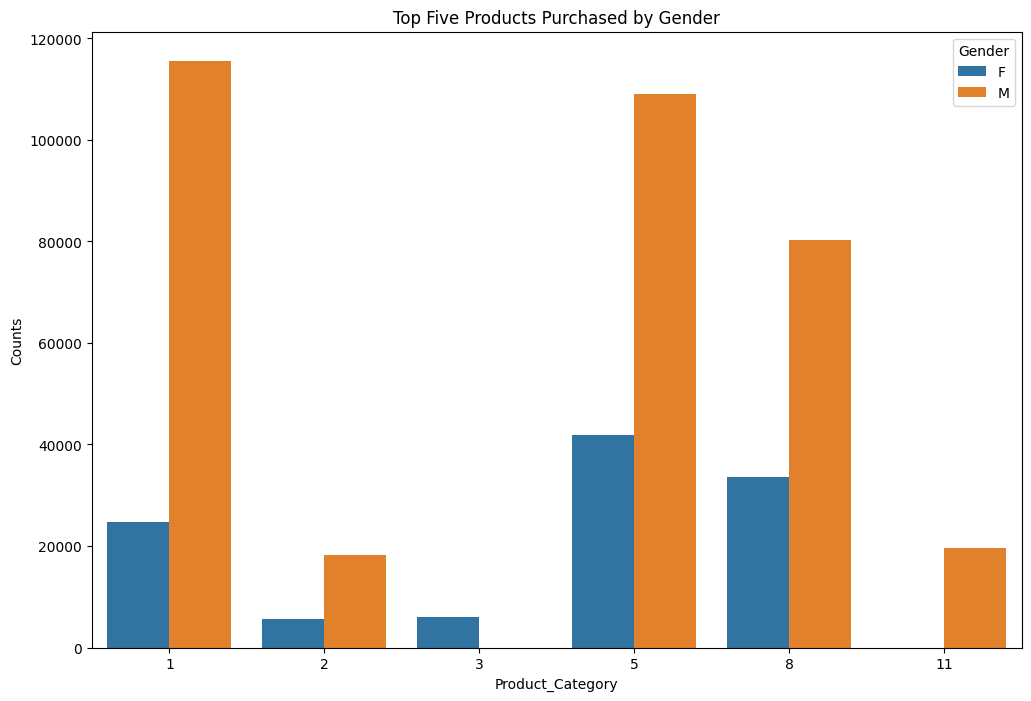

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products_by_gender, x='Product_Category', y='Counts', hue='Gender')
plt.title('Top Five Products Purchased by Gender')
plt.show()

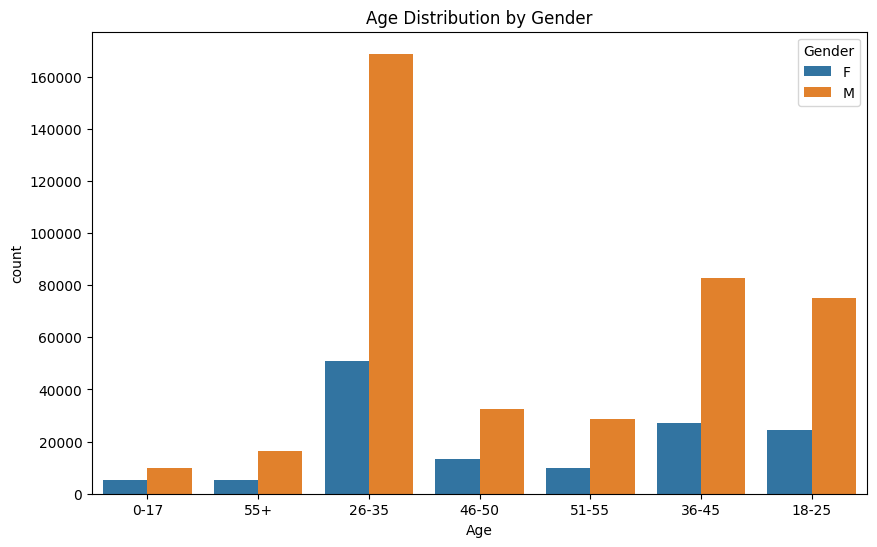

In [54]:
# Prominent Age Groups by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Gender')
plt.title('Age Distribution by Gender')
plt.show()

In [57]:
# Common Occupations by Gender
top_occupations_by_gender = df.groupby(['Gender', 'Occupation']).size().reset_index(name='Counts')
top_occupations_by_gender = top_occupations_by_gender.sort_values(['Gender', 'Counts'], ascending=[True, False]).groupby('Gender').head(9)
top_occupations_by_gender

,Gender,Occupation,Counts
0,F,0,18112
1,F,1,17984
4,F,4,17836
7,F,7,10028
20,F,20,8811
2,F,2,8629
6,F,6,8160
3,F,3,7919
14,F,14,6763
25,M,4,54472


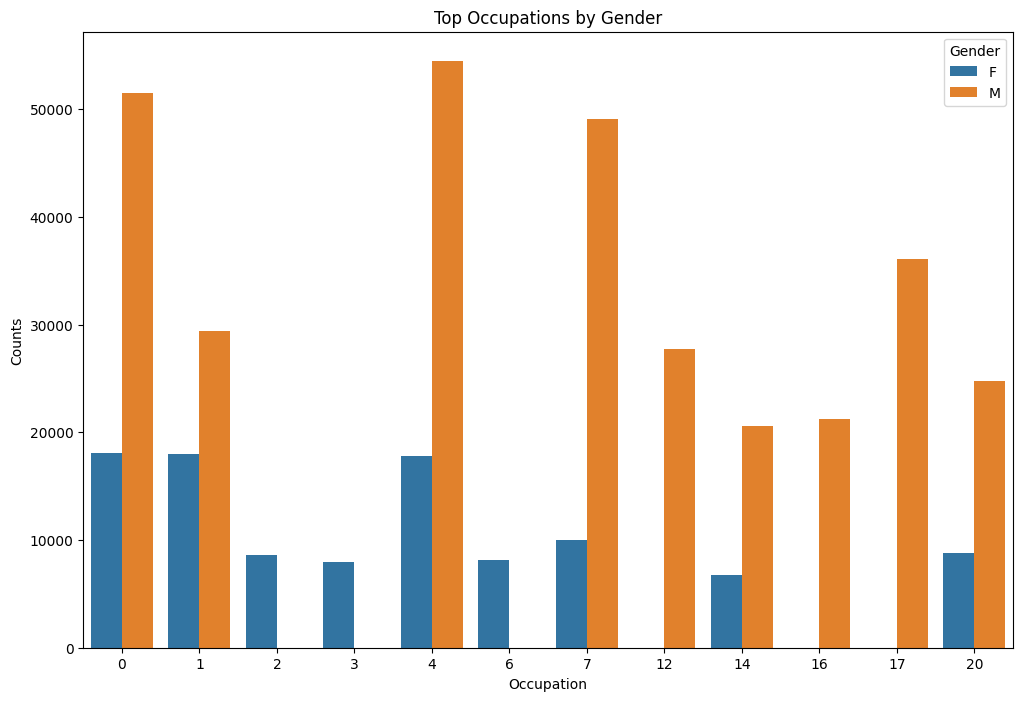

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_occupations_by_gender, x='Occupation', y='Counts', hue='Gender')
plt.title('Top Occupations by Gender')
plt.show()


In [59]:
# City Distribution by Gender
city_distribution_by_gender = df.groupby(['City_Category', 'Gender']).size().reset_index(name='Counts')
city_distribution_by_gender

,City_Category,Gender,Counts
0,A,F,35704
1,A,M,112016
2,B,F,57796
3,B,M,173377
4,C,F,42309
5,C,M,128866


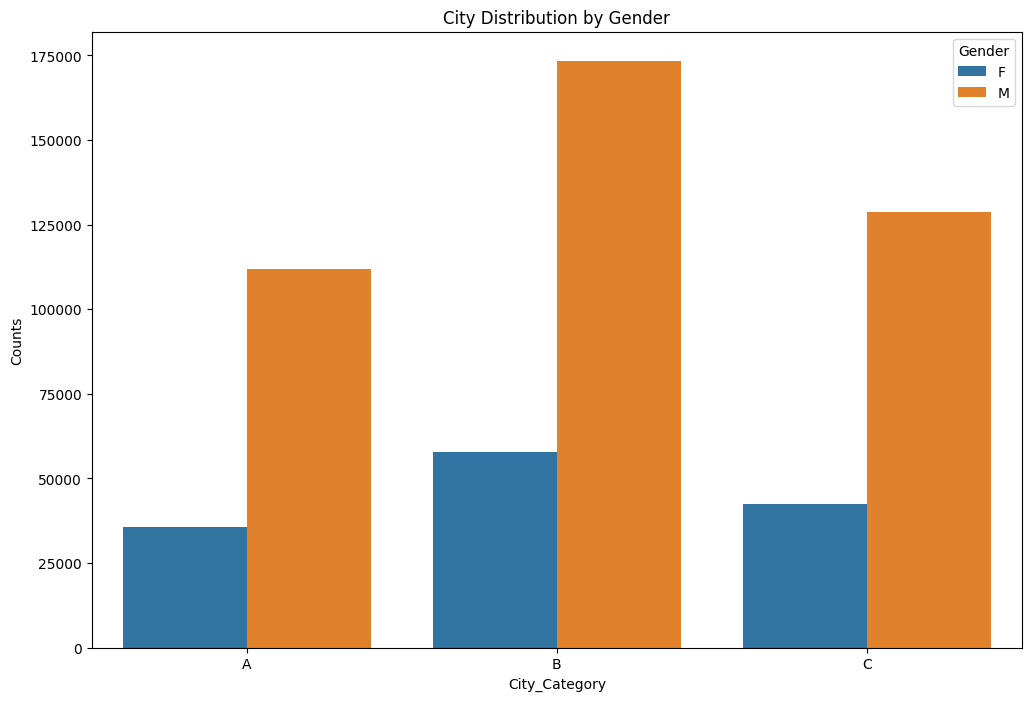

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(data=city_distribution_by_gender, x='City_Category', y='Counts', hue='Gender')
plt.title('City Distribution by Gender')
plt.show()

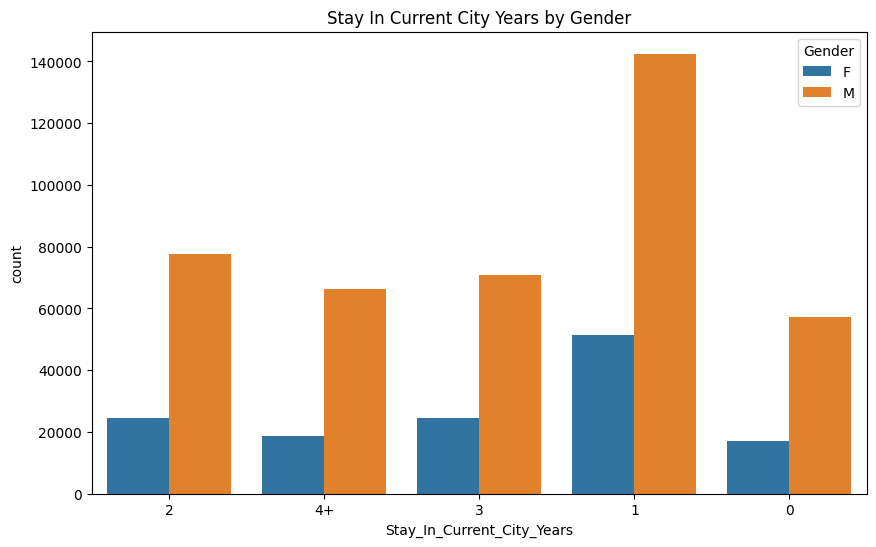

In [61]:
# Gender vs Stay_In_Current_City_Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Gender')
plt.title('Stay In Current City Years by Gender')
plt.show()

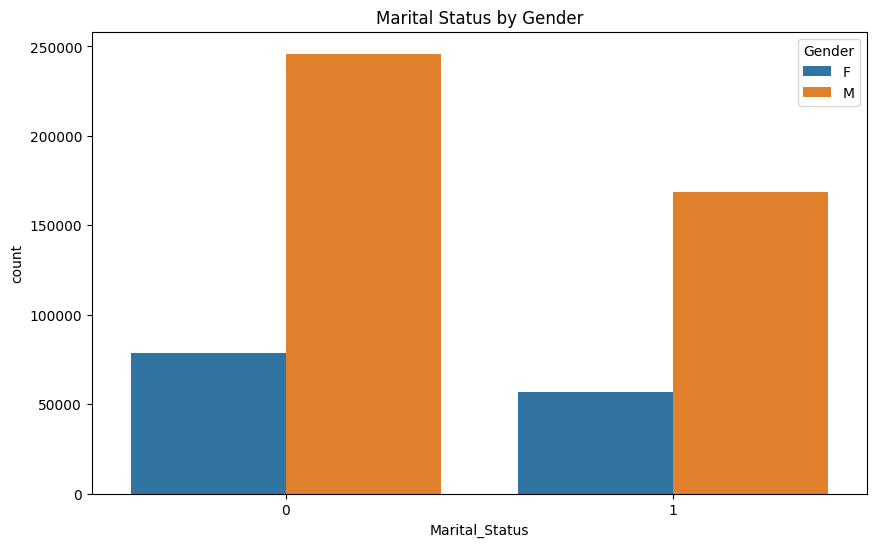

In [62]:
# Gender vs Marital_Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.title('Marital Status by Gender')
plt.show()


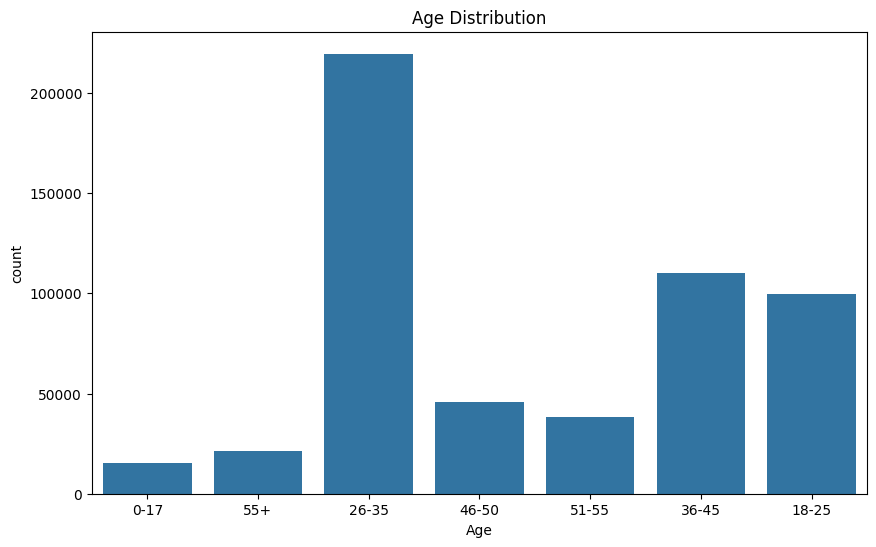

In [63]:
# Full Analysis on Age
# Age Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age')
plt.title('Age Distribution')
plt.show()

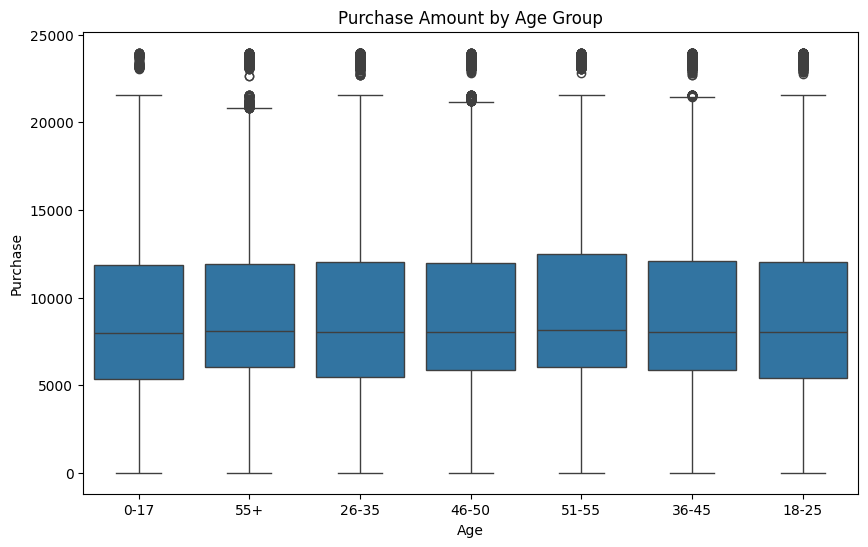

In [64]:
# Age vs Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Purchase Amount by Age Group')
plt.show()

In [65]:
# Age vs Product_Category
age_product_category = df.groupby(['Age', 'Product_Category']).size().reset_index(name='Counts')
age_product_category = age_product_category.sort_values(['Age', 'Counts'], ascending=[True, False]).groupby('Age').head(5)
age_product_category

,Age,Product_Category,Counts
4,0-17,5,4330
0,0-17,1,3585
7,0-17,8,2258
2,0-17,3,1200
1,0-17,2,805
24,18-25,5,28522
20,18-25,1,26962
27,18-25,8,17911
22,18-25,3,4710
30,18-25,11,4597


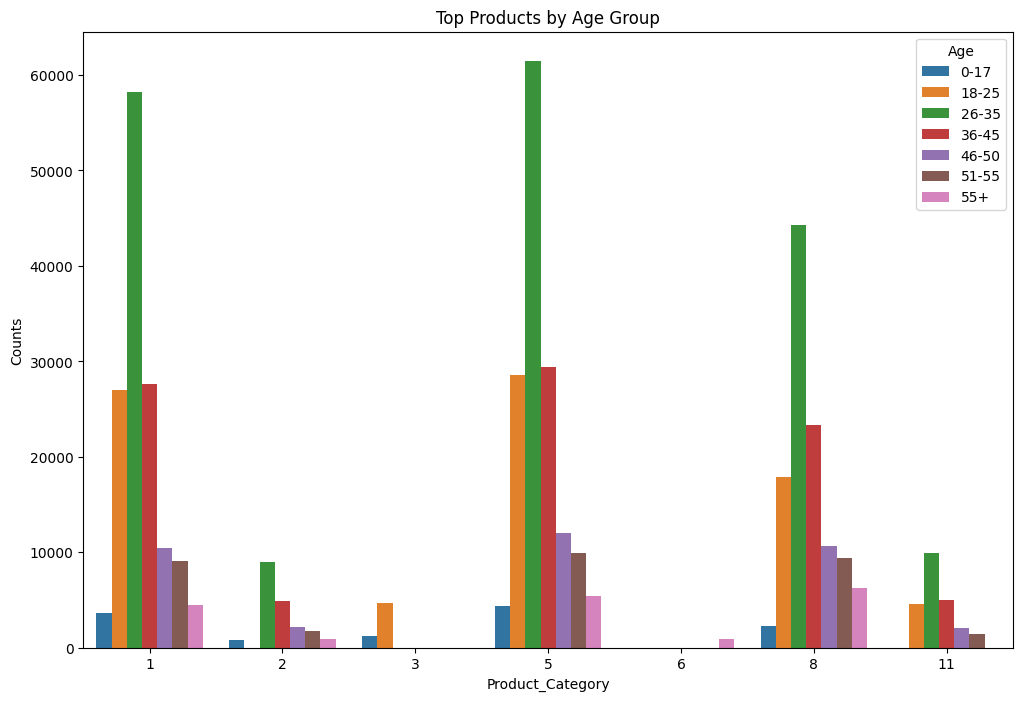

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(data=age_product_category, x='Product_Category', y='Counts', hue='Age')
plt.title('Top Products by Age Group')
plt.show()

In [67]:
# Age vs Occupation
age_occupation = df.groupby(['Age', 'Occupation']).size().reset_index(name='Counts')
age_occupation = age_occupation.sort_values(['Age', 'Counts'], ascending=[True, False]).groupby('Age').head(5)

In [69]:
age_occupation

,Age,Occupation,Counts
6,0-17,10,10951
0,0-17,0,2134
12,0-17,19,807
1,0-17,1,387
8,0-17,12,237
17,18-25,4,48241
13,18-25,0,9095
32,18-25,20,5445
25,18-25,12,4585
26,18-25,14,4388


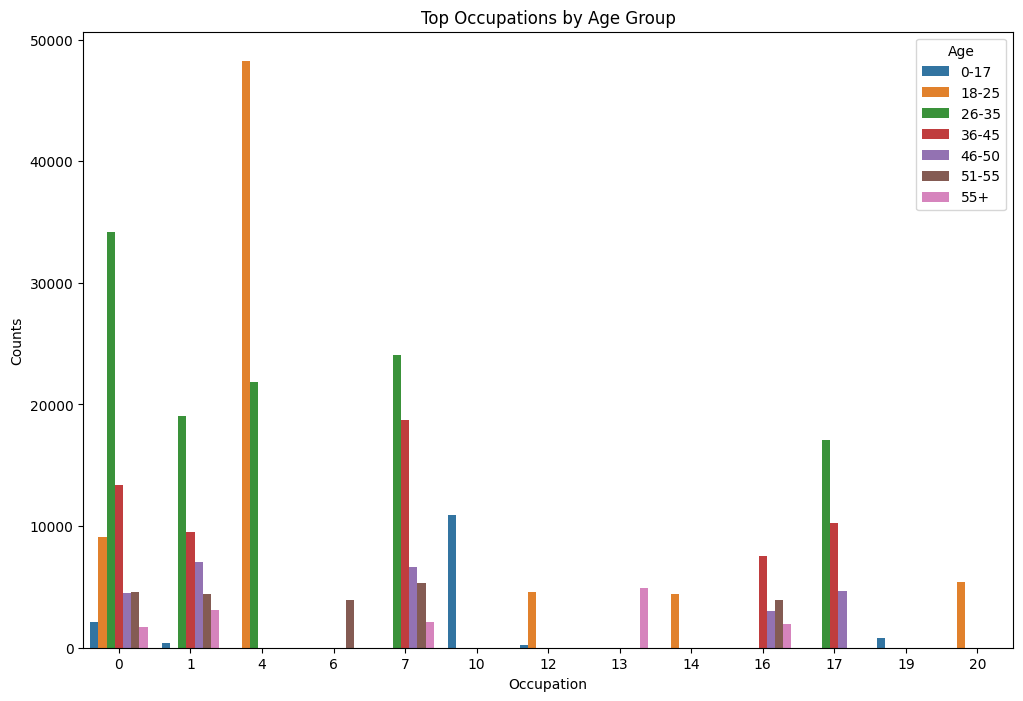

In [68]:
plt.figure(figsize=(12, 8))
sns.barplot(data=age_occupation, x='Occupation', y='Counts', hue='Age')
plt.title('Top Occupations by Age Group')
plt.show()

In [75]:

# Combined Analysis: Gender, Age, and Product_Category
combined_analysis = df.groupby(['Gender', 'Age', 'Product_Category']).size().reset_index(name='Counts')
combined_analysis = combined_analysis.sort_values(['Gender', 'Age', 'Counts'], ascending=[False, True, False]).groupby(['Gender', 'Age']).head(5)
combined_analysis

,Gender,Age,Product_Category,Counts
140,M,0-17,1,2820
144,M,0-17,5,2819
147,M,0-17,8,1398
142,M,0-17,3,694
150,M,0-17,11,500
...,...,...,...,...
127,F,55+,8,1778
124,F,55+,5,1374
120,F,55+,1,688
121,F,55+,2,184


In [79]:
# separating male and female
combined_analysis_m = combined_analysis[combined_analysis['Gender'] == 'M']
combined_analysis_f = combined_analysis[combined_analysis['Gender'] == 'F']

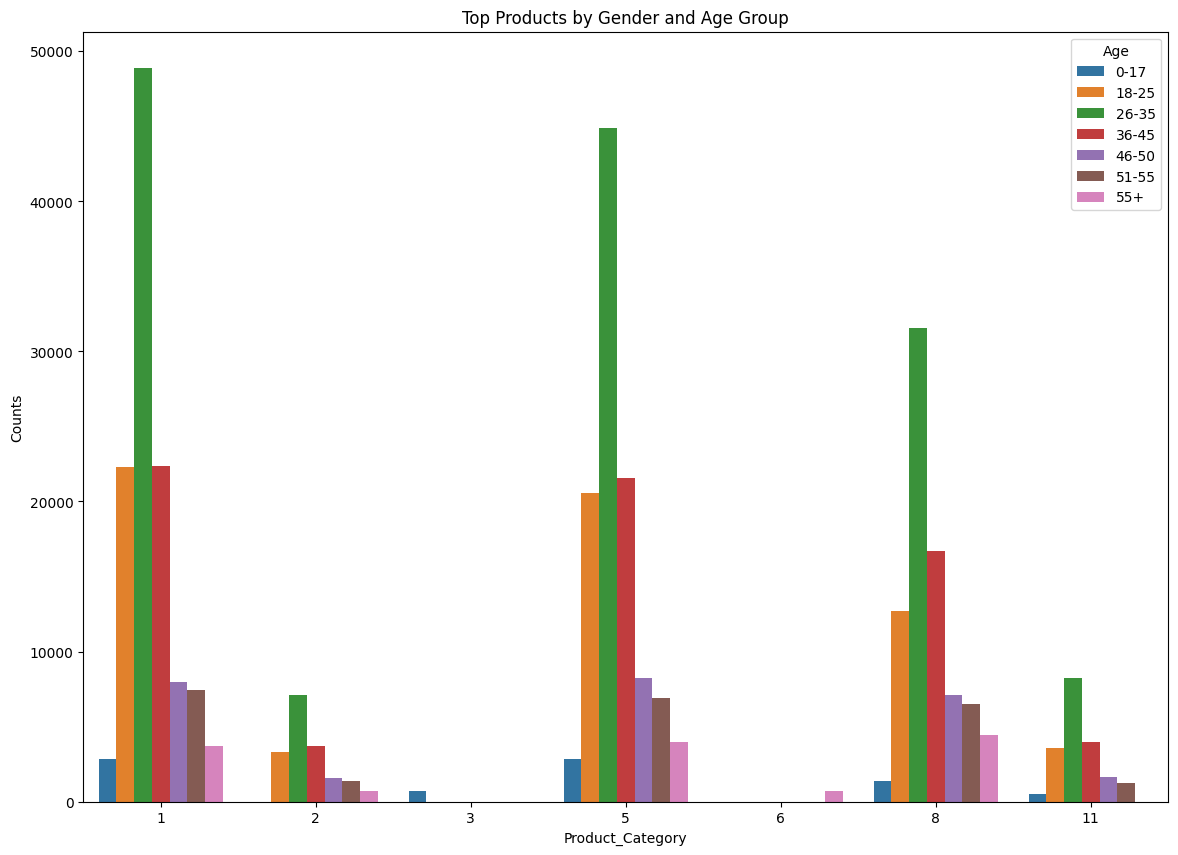

In [80]:
# plot for male
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_analysis_m, x='Product_Category', y='Counts', hue='Age')
plt.title('Top Products by Gender and Age Group')
plt.show()


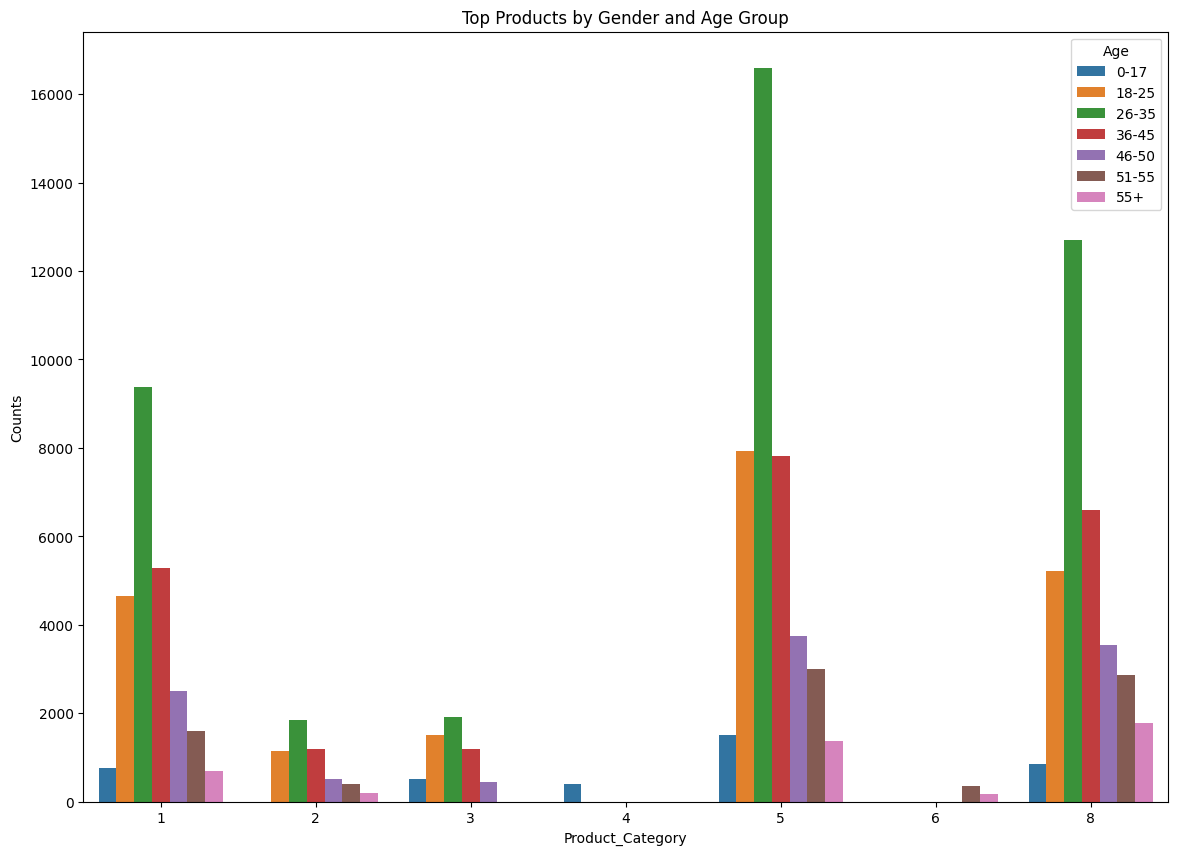

In [81]:
# plot for female
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_analysis_f, x='Product_Category', y='Counts', hue='Age')
plt.title('Top Products by Gender and Age Group')
plt.show()


In [83]:
# Combined Analysis: Gender, Age, and City_Category
combined_analysis_city = df.groupby(['Gender', 'Age', 'City_Category']).size().reset_index(name='Counts')
combined_analysis_city = combined_analysis_city.sort_values(['Gender', 'Age', 'Counts'], ascending=[False, False, False]).groupby(['Gender', 'Age']).head(5)
combined_analysis_city

,Gender,Age,City_Category,Counts
41,M,55+,C,9401
40,M,55+,B,3811
39,M,55+,A,3209
37,M,51-55,B,13498
38,M,51-55,C,10788
36,M,51-55,A,4321
34,M,46-50,B,14002
35,M,46-50,C,12143
33,M,46-50,A,6357
31,M,36-45,B,36488


In [85]:
# separating male and female
combined_analysis_city_m = combined_analysis_city[combined_analysis_city['Gender']=='M']
combined_analysis_city_f = combined_analysis_city[combined_analysis_city['Gender']=='F']

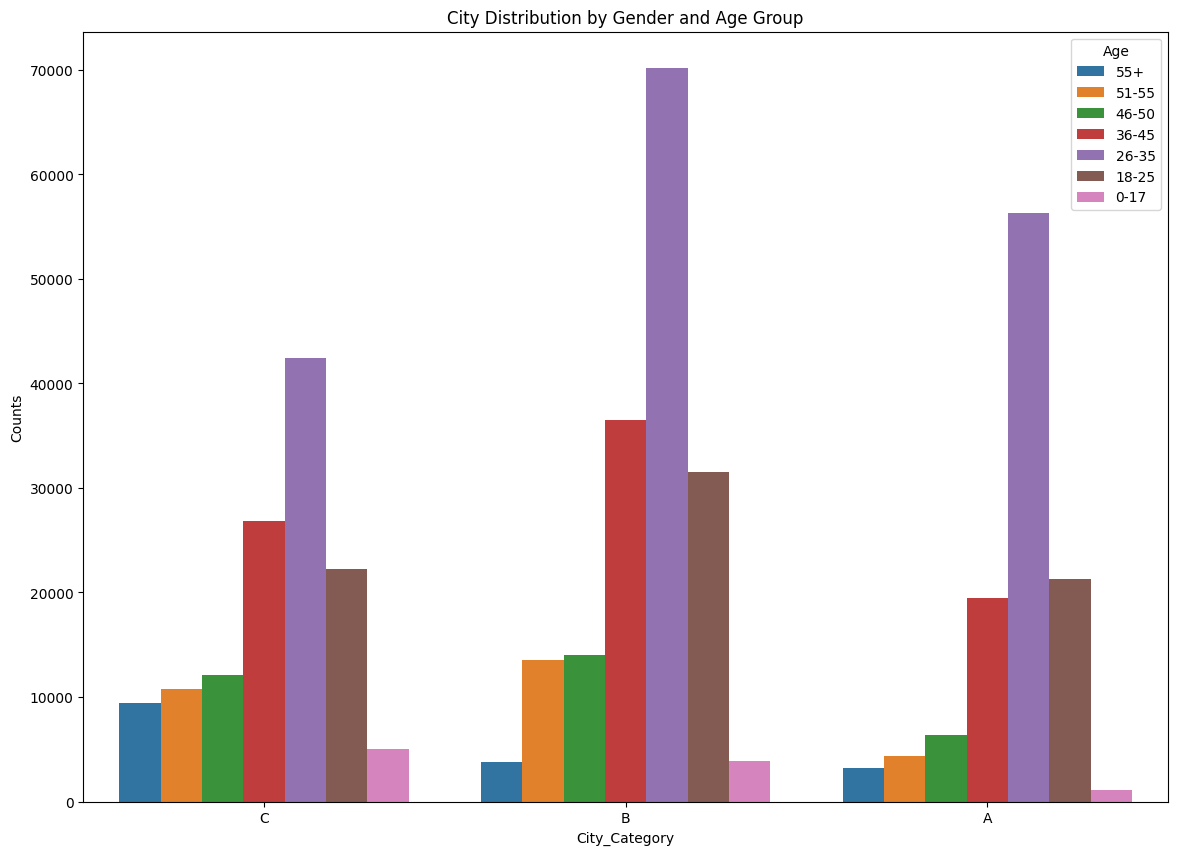

In [86]:
# Plot for male
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_analysis_city_m, x='City_Category', y='Counts', hue='Age')
plt.title('City Distribution by Gender and Age Group')
plt.show()

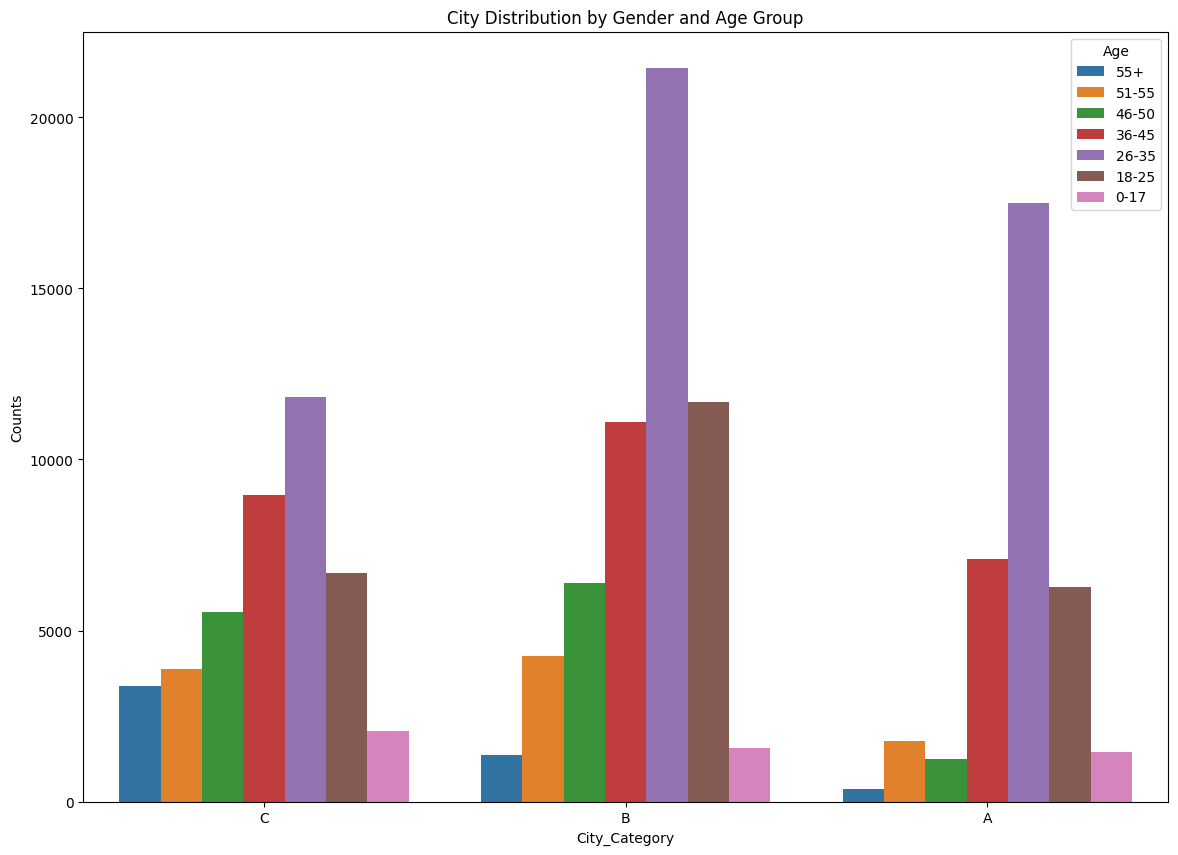

In [87]:
# Plot for female
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_analysis_city_f, x='City_Category', y='Counts', hue='Age')
plt.title('City Distribution by Gender and Age Group')
plt.show()

In [89]:
# Combined Analysis: Gender, Age, and Stay_In_Current_City_Years
combined_analysis_stay = df.groupby(['Gender', 'Age', 'Stay_In_Current_City_Years']).size().reset_index(name='Counts')
combined_analysis_stay = combined_analysis_stay.sort_values(['Gender', 'Age', 'Counts'], ascending=[True, False, False]).groupby(['Gender', 'Age']).head(5)
combined_analysis_stay

,Gender,Age,Stay_In_Current_City_Years,Counts
31,F,55+,1,1917
32,F,55+,2,1290
33,F,55+,3,713
34,F,55+,4+,657
30,F,55+,0,506
...,...,...,...,...
36,M,0-17,1,3332
37,M,0-17,2,2203
38,M,0-17,3,1589
35,M,0-17,0,1515


In [91]:
# Separating the Gender again
combined_analysis_stay_m = combined_analysis_stay[combined_analysis_stay['Gender'] == 'M']   
combined_analysis_stay_f = combined_analysis_stay[combined_analysis_stay['Gender'] == 'F']

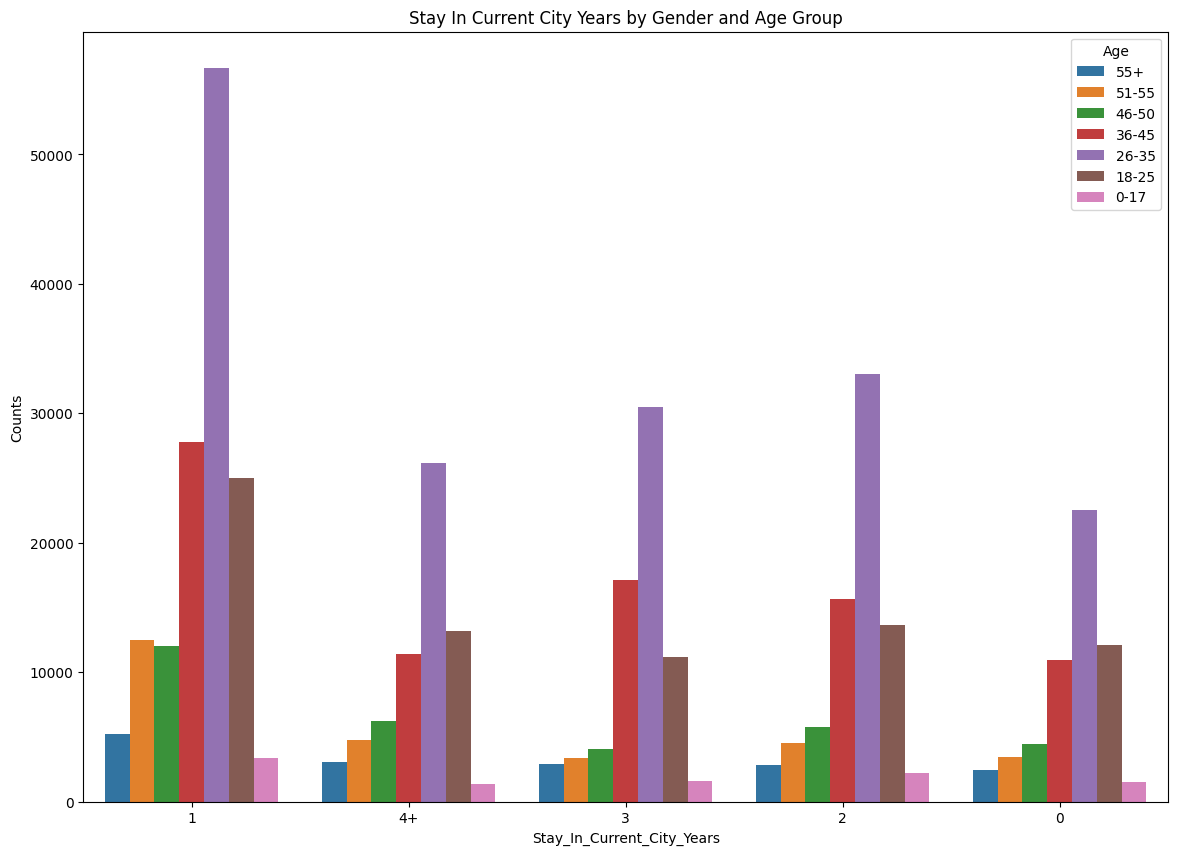

In [93]:
# Plot for males
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_analysis_stay_m, x='Stay_In_Current_City_Years', y='Counts', hue='Age')
plt.title('Stay In Current City Years by Gender and Age Group')
plt.show()

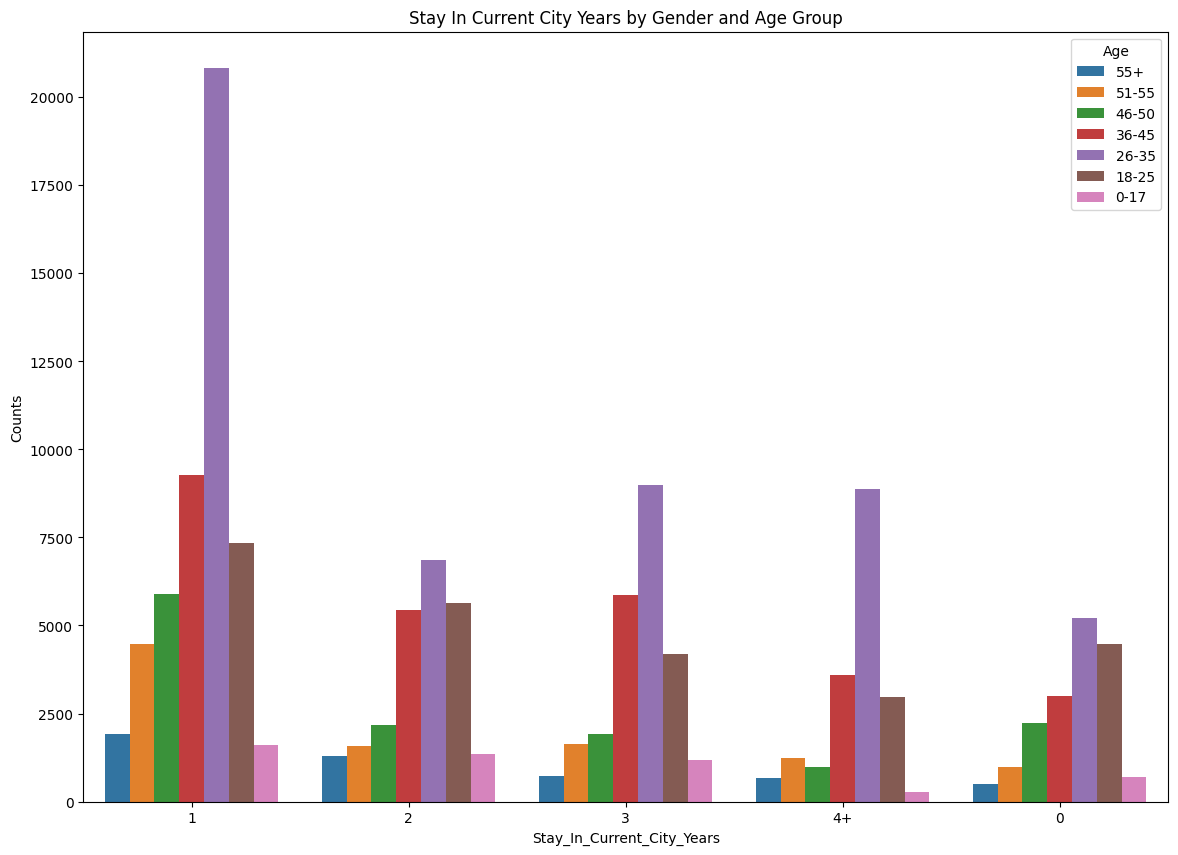

In [94]:
# Plot for females
plt.figure(figsize=(14, 10))
sns.barplot(data=combined_analysis_stay_f, x='Stay_In_Current_City_Years', y='Counts', hue='Age')
plt.title('Stay In Current City Years by Gender and Age Group')
plt.show()